# Machine Learning Homework 02

In [1]:
#Basic
import pandas as pd
import numpy as np 
import random   
import os
import time
from datetime import timedelta
import pickle

In [2]:
#ML
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, precision_score, recall_score
from math import sqrt
from scipy import stats as st
import statsmodels.api as sm

In [3]:
#Visualization               
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Problem 1



**1. Example of regression with one variable. Consider the following simple data set of four points:**

(x, y): (1, 1), (1, 3), (4, 4), (4, 6).

**(a) Suppose you had to predict y without knowledge of x. What value would you predict? What would be its mean squared error (MSE) on these four points?**

According to the MSE formula without knowledge of x, we know that :

$\hat{Y} = \frac{1}{n}\sum \limits _{i=1} ^{n} Y_{i} $

$ MSE = \frac{1}{n}\sum \limits _{i=1} ^{n} (Y_{i}-\hat{Y})^2$

Let's caculate the MSE by the formula.

In [5]:
x = np.array([1.0,1.0,4.0,4.0])
y = np.array([1.0,3.0,4.0,6.0])

In [6]:
y_mean = sum(y)/len(y)

MSE_y = sum((y - y_mean) ** 2)/len(y)
MSE_y

3.25

We can get the result of MSE = 3.25

**(b) Now let’s say you want to predict y based on x. What is the MSE of the linear function y = ax on these four points?**

Suppose that we predict y based on x, our linear function is $\hat{Y} =  \hat{\beta}_{1}X$

$ MSE = \frac{1}{n}\sum \limits _{i=1} ^{n} (Y_{i}-\hat{Y})^2$

Then we can caculate the MSE by MSE = f(a).

$ MSE = \frac{1}{n}\sum \limits _{i=1} ^{n} (Y_{i}-\hat{Y})^2 
      = \frac{1}{4}((1-1a)^2+(3-1a)^2+(4-4a)^2+(6-4a)^2)
      = \frac{1}{4}(34a^2-88a+62)
      = \frac{17}{2}a^2 -22a + \frac{31}{2}$
      
In order to obtain the local minimum, we need to obtain the derivative funtion of MSE, which is f'(a)

$ f'(a) = 17a -22 = 0$

$ a = \frac{22}{17}$

When a is $\frac{22}{17}$, we will have the minimum MSE.

**(c) Find the line y = ax + b that minimizes the MSE on these points. What is its MSE?**

When the linear regression function is $\hat{Y} = \hat{\beta}_{0} + \hat{\beta}_{1}X$ ,

we know that ${\beta}_{1} = \frac{\sum (X_{i}-\hat{X})(Y_{i}-\hat{Y})}{\sum (X_{i}-\hat{X})^2}$

In [7]:
x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)
print(x_mean, y_mean)

2.5 3.5


Let's use the table to see the process of caculation

| X | Y | X–X_mean |Y–Y_mean| (X–X_mean)^2|(X–X_mean)(Y–Y_mean)|
| --- | --- | ---   | --- | --- | --- | 
|  1  |  1  | -1.5| -2.5 | 2.25 | 3.75|
|  1  |  3  | -1.5| -0.5 | 2.25 | 0.75 |
|  4  |  4  | 1.5 | 0.5 | 2.25 | 0.75 |
|  4  |  6  | 1.5 | 2.5 | 2.25 | 3.75 |

Let's find out the value of $\hat{\beta}_{1}$

In [8]:
b1 = sum((x - x_mean)*(y - y_mean)) / sum((x - x_mean)**2)
b1

1.0

Let's find out the value of  $\hat{\beta}_{0}$ by mean point of (x,y)

$\hat{Y} = \hat{\beta}_{0} + \hat{\beta}_{1}X$ 

In [16]:
y1 = y_mean
x1 = x_mean
b0 = y1 - b1*x1 
b0

1.0

Therefore, we can obtain the function of the data is  

$\hat{Y} = 1 + X$ 

Then, we caculate the MSE by formula.

$ MSE = \frac{1}{n}\sum \limits _{i=1} ^{n} (Y_{i}-\hat{Y})^2
      =\frac{1}{4}((-1)^2+1^2+(-1)^2+1^2)
      = 1$

We can get the result of MSE = 1

# Problem 2
## Linear Regression

In this problem, you will analyze potential relationships between baseball player salaries and the players’ statistics. 

You have several features: batting average, on base, runs, hits, doubles, triples, home runs, RBI, walks, strike outs, and stolen bases. 

Your goal will be to see if any one of these listed features makes for a good linear relationship. Report your linear models for each feature, the overall error in the model, and the feature (if any) that you would advice is the best single indicator for salary.

### Data Loading

In [1]:
data_dir = '/Users/chiyunchen/pythonProject/ML_hw2/data'
!ls '/Users/chiyunchen/pythonProject/ML_hw2/data'

baseball-9192.csv


In [5]:
baseball = pd.read_csv(data_dir + '/baseball-9192.csv')
baseball.drop(columns = ['Unnamed: 0'],inplace =True)

In [6]:
baseball.head()

,Salary,BattingAvg,OnBasePct,Runs,Hits,Doubles,Triples,HomeRuns,RBI,Walks,Strikeouts,StolenBases,Errors,FreeAgencyElig,FreeAgent9192,ArbitrationElig,Arbitration9192,Name
0,3300,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0,Andre Dawson
1,2600,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0,Steve Buchele
2,2500,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0,Kal Daniels
3,2475,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0,Shawon Dunston
4,2313,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0,Mark Grace


### Data Wrangling

In [7]:
df = baseball.drop(columns = ['Name'])

In [8]:
df.isnull().sum().sum()

0

Text(0.5, 1.0, 'Correlation of All Features')

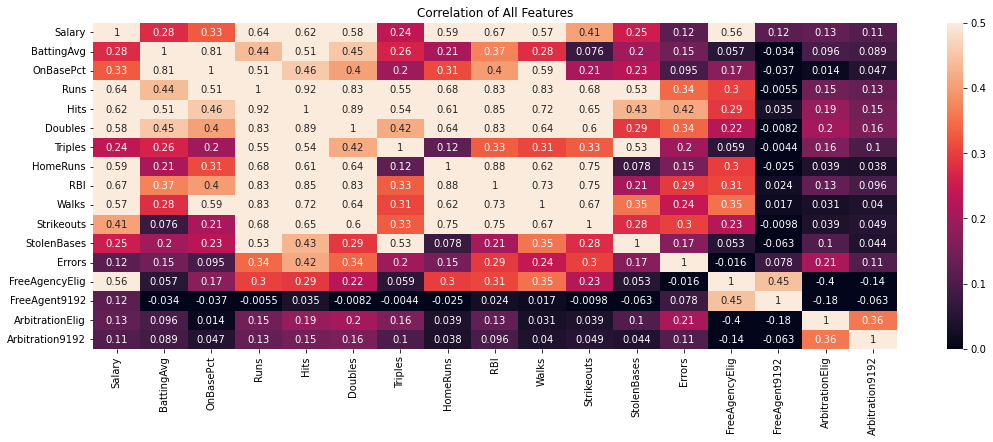

In [11]:
plt.figure(figsize=(18,6))
corr = df.corr()
sns.heatmap(corr, vmin=0.5, vmax=0, annot= True)
plt.title('Correlation of All Features')

In [25]:
cols = df.columns.to_list()
print(cols)

['Salary', 'BattingAvg', 'OnBasePct', 'Runs', 'Hits', 'Doubles', 'Triples', 'HomeRuns', 'RBI', 'Walks', 'Strikeouts', 'StolenBases', 'Errors', 'FreeAgencyElig', 'FreeAgent9192', 'ArbitrationElig', 'Arbitration9192']


In [14]:
features = ['BattingAvg', 'OnBasePct', 'Runs', 'Hits', 'Doubles', 'Triples',
       'HomeRuns', 'RBI', 'Walks', 'Strikeouts', 'StolenBases', 'Errors',
       'FreeAgencyElig', 'FreeAgent9192', 'ArbitrationElig','Arbitration9192']

## Model Training and Evaluation

In [15]:
def caculate_plot_LR_model(df, feature, test_size=0.25,random_state = 41):
    
    ## Data Loading
    X = df[[feature]]
    y = df.Salary
    ## Data Spliting
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 41)
    ## Model Training
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train) 
    ## Prediction
    y_pred = lm.predict(X_test) 
    ##Metrics
    ttest = lm.coef_/st.sem(X_train)
    score = lm.score(X_train, y_train)
    r2 = r2_score(y_test,y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    result = [ttest, lm.coef_, MAE, MSE, RMSE, score, r2]
    return result 

In [16]:
result_list = []
for feature in features:
    data = caculate_plot_LR_model(df, feature)
    result_list.append(data)   

In [17]:
metrics = ['T-test','Coefficients','MAE', 'MSE', 'RMSE', 'score', 'r2']

## Results

In [21]:
result = pd.DataFrame(result_list, columns = metrics).transpose()
result.columns = features
result.sort_values(by = 'r2', axis = 1, ascending = False)

,Runs,RBI,Walks,FreeAgencyElig,Hits,HomeRuns,Doubles,Strikeouts,OnBasePct,StolenBases,Triples,BattingAvg,FreeAgent9192,Errors,Arbitration9192,ArbitrationElig
T-test,[14.062652982530922],[14.028867733001517],[17.704675703250675],[40803.13718629444],[4.274803415040396],[123.61348965305218],[94.03681525018324],[6.426422031977003],[3014600.5850220583],[25.764046558205095],[658.9432846663101],[3510402.6740431557],[23957.768831391193],[77.65629606052258],[68993.76857969235],[20695.644910440675]
Coefficients,[25.241290236044403],[26.163618099255256],[26.19512358827454],[1255.5371057513905],[13.927545842861278],[71.99893739861275],[63.32405853260086],[13.237380678795637],[8404.630047696985],[17.459300701287827],[103.73784397457541],[8622.870218590613],[489.71801801801803],[28.864818645979597],[850.1198347107442],[524.8372841673986]
MAE,693.860376,706.116011,739.220125,757.609582,741.457832,783.300726,790.405974,907.208163,1019.930586,1039.813115,1047.276575,1071.262002,1094.491966,1112.676241,1104.252261,1129.466687
MSE,882991.123462,926373.105066,1024254.793939,1050535.041598,1050574.335147,1059705.320418,1208799.422229,1416969.510121,1610355.277247,1611117.813958,1717564.959568,1720818.146909,1843317.655797,1850777.690902,1866955.290199,1900512.011459
RMSE,939.676074,962.482782,1012.054739,1024.956117,1024.975285,1029.419895,1099.454147,1190.365284,1268.997745,1269.298158,1310.559026,1311.799583,1357.68835,1360.432906,1366.365723,1378.590589
score,0.360679,0.418365,0.263946,0.262265,0.361806,0.309017,0.319513,0.130641,0.096477,0.024597,0.046866,0.078832,0.017608,0.020227,0.01928,0.031128
r2,0.513537,0.489637,0.435711,0.421233,0.421211,0.416181,0.334041,0.219355,0.112813,0.112393,0.053749,0.051957,-0.015532,-0.019642,-0.028554,-0.047042


Featrue "Runs" has a the best performance in single feature linear regression mode by having the greatest r2 vlaue.



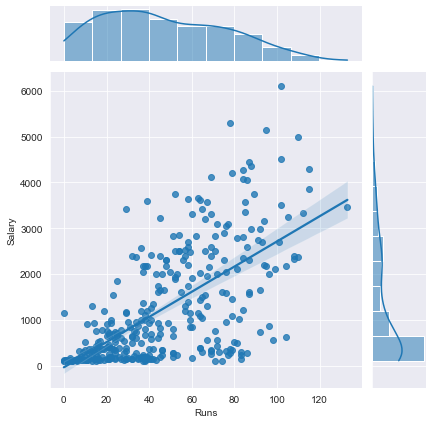

In [22]:
sns.set_style("darkgrid")
sns.jointplot(x="Runs", y="Salary", data=df, kind="reg")

# Problem 3
##  Logistic Regression

In this problem, you are going to build a logistic regression digit classifier using the same MNIST dataset you used in the past homework. If you don’t already have the files, first go and download them from the class website. (For a description of the data format, please see the last Homework) 

Please append your final code for this problem to the end of your submission. 

Since the label set for this task consists of ten possible digits, you will be building a multi-class logistic regression classifier. 

Your submission file should be in the following format: For each of the 10k images in the test_mnist.csv set, output a single line containing the ImageId and the digit you predict. You will also submit a short 1 to 2 (max) page writeup of how you evaluated the performance of your logistic regression model. 

Compare and contrast your kNN MNIST classifier model to your Logistic Regression MNIST classifier model.

## 1. Data Loading

In [17]:
data_dir = '/Users/chiyunchen/pythonProject/ML_hw1/data'
!ls '/Users/chiyunchen/pythonProject/ML_hw1/data'

data_mnist.csv data_mnist.zip test_mnist.csv test_mnist.zip


In [18]:
data = pd.read_csv(data_dir+'/data_mnist.csv')
test = pd.read_csv(data_dir+'/test_mnist.csv')

In [19]:
start_time = time.time()

mnist = np.array(data)
mnist_prediction= np.array(test)
X, y= mnist[:,1:], mnist[:,0]
print("X Data Shape is ", X.shape)
print("y Data Shape is ", y.shape)
print("The Data Shape for Prediction is ",mnist_prediction.shape)

print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

X Data Shape is  (42000, 784)
y Data Shape is  (42000,)
The Data Shape for Prediction is  (10000, 784)
--- 0:00:00.120003 time elapsed ---


## 2. Model

### 2.1 Normalization

In [21]:
norm_X = X/ 255.0

### 2.2 Data Spliting

According to many test run of logistic model, we noticed that the cost of caculation of logistic is more expensize than knn. Therefore, consider we only use local computer, we would like to have a smaller training dataset and set the  a bigger test_size as 33% of the dataset.

In [22]:
X_train,X_test,y_train,y_test = train_test_split(norm_X,y,test_size=0.33,random_state = 41, stratify=y)

### 2.3 Model Training
**Cross Validation by GrindsearchCV**

The parameters:
 - solver: Algorithm to use in the optimization problem.
    - 'lbfgs': Stands for limited-memory BFGS. 
    - 'newton-cg': It use an exact Hessian matrix to find the parameter weights that minimize a cost function.
    - 'sag': Stochastic Average Gradient descent
    - 'saga': It is a variant of “sag” and supports the non-smooth penalty="l1" that is a choice for sparse multinomial logistic regression.
 - penalty : Specify the norm of the penalty, also known as regularization, which is adopted universally as simple data models generalize better and are less prone to overfitting.
    - l1 : L1 regularization is equal to the absolute value of the magnitude of coefficient, or simply restricting the size of coefficients.
    - l2 : L2 regularization is equal to the square of the magnitude of coefficients.

 - C: Inverse of regularization strength that usually search logarithmically: [.001, .01, .1, 1, 10, 100, 1000]
 - tol: Tolerance for stopping criteria, which tells when to stop searching for a minimum (or maximum) once some tolerance is achieved.
 
For a multiclass problem, we can only consider 'lbfgs',‘newton-cg’, ‘sag’, ‘saga’. 

The 'lbfgs' solver only calculates an approximation to the Hessian based on the gradient which makes it computationally more effective. Its memory usage is limited compared to regular bfgs, and we have to increase the setting of **max_iter** to complete the training. Considering the max_iter needs to be very high and the lead to high time-consuming calculation, we don't include 'lbfgs' into the GrindSearchCV( ).

According to many test runs of the logistic model, we noticed that the time consuming of 'saga' as the solver is significantly higher than others. Besides, 'Saga' is a variant of ‘sag’, which adopt Stochastic Average Gradient descent as well, we decided to only include ‘sag’ but ‘saga’ in the GrindSearchCV( ) to review for further analysis.

In [23]:
lr = LogisticRegression(max_iter= 3000)
parameters = {'solver':['newton-cg','sag'],
              'penalty': ['l1', 'l2'],
              'C':[0.1,1,10],
              'tol':[1e-3,1e-4]}
# Evaluate an algorithm using a cross Validation and set folds = 4
gridsearch = GridSearchCV(lr, parameters, cv=4,scoring='accuracy',verbose=2)
gridsearch_result = gridsearch.fit(X_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV] END .....C=0.1, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.1s
[CV] END .....C=0.1, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END .....C=0.1, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END .....C=0.1, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END ....C=0.1, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END ....C=0.1, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END ....C=0.1, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END ....C=0.1, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END ...........C=0.1, penalty=l1, solver=sag, tol=0.001; total time=   0.0s
[CV] END ...........C=0.1, penalty=l1, solver=sag, tol=0.001; total time=   0.0s
[CV] END ...........C=0.1, penalty=l1, solver=sag, tol=0.001; total time=   0.0s
[CV] END ...........C=0.1, penalty=l1, solver=sa

#### Get the best Parameters of the Model

In [24]:
accuracy = gridsearch_result.best_score_*100
print("Best Parameters of the Model is: ",gridsearch_result.best_params_)
print("Accuarcy : {:.2f}%".format(accuracy))

Best Parameters of the Model is:  {'C': 0.1, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.001}
Accuarcy : 91.60%


By the attributes of GridSearchCV( ) we can obtain the best model parameters combination, which is
 - C = 0.1
 - penalty = l2
 - solver = sag
 - tol = 0.001

Next,  we print out all model results from the GridSearchCV( ). We can see that most of the model has very close accuracy but the one that C = 10. Since'newton-cg' and 'sag' do not support 'l1', the accuracy will show 'NaN' in the table.

However, if we consider the time-consuming issue, 'newton-cg' is a better choice. Therefore, let take create a model for both 'sag' and 'newton-cg' to check it out.

In [25]:
cv_resultDF = pd.concat([pd.DataFrame(gridsearch_result.cv_results_["params"]),pd.DataFrame(gridsearch_result.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
cv_resultDF

,C,penalty,solver,tol,Accuracy
0,0.1,l1,newton-cg,0.0010,NaN
1,0.1,l1,newton-cg,0.0001,NaN
2,0.1,l1,sag,0.0010,NaN
3,0.1,l1,sag,0.0001,NaN
4,0.1,l2,newton-cg,0.0010,0.915956
5,0.1,l2,newton-cg,0.0001,0.915956
6,0.1,l2,sag,0.0010,0.915991
7,0.1,l2,sag,0.0001,0.915956
8,1.0,l1,newton-cg,0.0010,NaN
9,1.0,l1,newton-cg,0.0001,NaN


**Model - solver ='sag'**

In [27]:
sag_model = LogisticRegression(C =0.1, solver ='sag',penalty="l2",max_iter=3000, tol=1e-3)
sag_model.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=3000, solver='sag', tol=0.001)

In [28]:
y_pred_sag = sag_model.predict(X_test)

In [29]:
class_report_sag = classification_report(y_test, y_pred_sag)
accuracy_sag = accuracy_score(y_test,y_pred_sag)*100
precision_sag = precision_score(y_test,y_pred_sag,average='micro')*100
recall_sag = recall_score(y_test,y_pred_sag,average='micro')*100

In [30]:
print('================= Logistic Model Evaluation =================')
print('======================= Solver : Sag ========================')
print("Model Score is %.3f" % sag_model.score(X_train, y_train))
print(class_report_sag)
print('')
print("Accuracy is : {:.3f}%".format(accuracy_sag) )
print("Precision is : {:.3f}%".format(precision_sag) )
print("Recall is : {:.3f}%".format(recall_sag) )

================= Logistic Model Evaluation =================
======================= Solver : Sag ========================
Model Score is 0.935
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1364
           1       0.95      0.98      0.97      1546
           2       0.92      0.89      0.90      1378
           3       0.90      0.89      0.89      1436
           4       0.92      0.93      0.92      1344
           5       0.88      0.86      0.87      1252
           6       0.95      0.96      0.95      1365
           7       0.92      0.94      0.93      1452
           8       0.89      0.87      0.88      1341
           9       0.90      0.90      0.90      1382

    accuracy                           0.92     13860
   macro avg       0.92      0.92      0.92     13860
weighted avg       0.92      0.92      0.92     13860


Accuracy is : 91.934%
Precision is : 91.934%
Recall is : 91.934%


**Model - solver = 'newton-cg'**

In [31]:
newton_model = LogisticRegression(C =0.1, solver ='newton-cg',penalty="l2",max_iter=3000, tol=1e-3)
newton_model.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=3000, solver='newton-cg', tol=0.001)

In [32]:
y_pred_newton = newton_model.predict(X_test)

In [33]:
class_report_newton = classification_report(y_test, y_pred_newton)
accuracy_newton = accuracy_score(y_test,y_pred_newton)*100
precision_newton = precision_score(y_test,y_pred_newton,average='micro')*100
recall_newton = recall_score(y_test,y_pred_newton,average='micro')*100

In [37]:
print('================= Logistic Model Evaluation =================')
print('===================== Solver : newton-cg ====================')
print("Model Score is %.3f" % newton_model.score(X_train, y_train))
print(class_report_newton)
print('')
print("Accuracy is : {:.3f}%".format(accuracy_newton) )
print("Precision is : {:.3f}%".format(precision_newton) )
print("Recall is : {:.3f}%".format(recall_newton) )

================= Logistic Model Evaluation =================
===================== Solver : newton-cg ====================
Model Score is 0.935
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1364
           1       0.95      0.98      0.97      1546
           2       0.92      0.89      0.90      1378
           3       0.90      0.89      0.89      1436
           4       0.92      0.93      0.92      1344
           5       0.88      0.86      0.87      1252
           6       0.95      0.96      0.95      1365
           7       0.92      0.94      0.93      1452
           8       0.89      0.87      0.88      1341
           9       0.90      0.90      0.90      1382

    accuracy                           0.92     13860
   macro avg       0.92      0.92      0.92     13860
weighted avg       0.92      0.92      0.92     13860


Accuracy is : 91.934%
Precision is : 91.934%
Recall is : 91.934%


To review the accuracy of the logistic model from two solvers, we can see that the model that adopts 'newton-cg' as solver has a better prediction accuracy, precision, and recall. Thus, we decide to adopt this model as our best logistic model.

### 2.4 Model Saving

In [38]:
pickle.dump(sag_model, open("logistic_sag_model.pkl", "wb"))
pickle.dump(newton_model, open("logistic_newton_model.pkl", "wb"))

## 3. Prediction

### 3.1 Model Loading

In [45]:
loaded_model = pickle.load(open("logistic_newton_model.pkl", 'rb'))

### 3.2 Normalization

In [46]:
mnist_prediction = mnist_prediction/255.0

### 3.3 Prediction

In [47]:
results = loaded_model.predict(mnist_prediction)

## 4. Submission

In [48]:
sub = pd.DataFrame({'ImageId':np.arange(10000),'Label':results.squeeze().astype(np.int)})
sub["ImageId"]=sub["ImageId"]+1
sub.head()

,ImageId,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4


In [49]:
sub.shape

(10000, 2)

In [50]:
sub.to_csv('hw02_submission.csv', index=False)

## 5. Compare with kNN Classifier and Logistic Regression Model

Let's compare our logistic model with the kNN classifier model we have made before from the same dataset.

**Model Lodaing**

In [51]:
knn_model = pickle.load(open("Best_knn_model.pkl", 'rb'))

In [52]:
y_pred_knn = knn_model.predict(X_test)

**Model Evaluation**

In [53]:
knn_class_report = classification_report(y_test, y_pred_knn)
knn_accuracy = accuracy_score(y_test,y_pred_knn)*100
knn_precision = precision_score(y_test,y_pred_knn,average='micro')*100
knn_recall = recall_score(y_test,y_pred_knn,average='micro')*100

In [56]:
print('================= kNN = 4 Classifier Model Evaluation =================')
print('')
print(knn_class_report)
print("Accuracy of testing dataset of n_neighbors=4 is : {:.3f}%".format(knn_accuracy ) )
print("Precision of testing dataset of n_neighbors=4 is : {:.3f}%".format(knn_precision) )
print("Recall of testing dataset of n_neighbors=4 is : {:.3f}%".format(knn_recall) )

================= kNN = 4 Classifier Model Evaluation =================

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1364
           1       0.97      1.00      0.98      1546
           2       0.99      0.97      0.98      1378
           3       0.98      0.98      0.98      1436
           4       0.98      0.97      0.98      1344
           5       0.97      0.97      0.97      1252
           6       0.98      0.99      0.99      1365
           7       0.96      0.98      0.97      1452
           8       0.99      0.95      0.97      1341
           9       0.96      0.97      0.96      1382

    accuracy                           0.98     13860
   macro avg       0.98      0.98      0.98     13860
weighted avg       0.98      0.98      0.98     13860

Accuracy of testing dataset of n_neighbors=4 is : 97.605%
Precision of testing dataset of n_neighbors=4 is : 97.605%
Recall of testing dataset of n_neighbors=4 is : 97.

We can see that all model evaluation metrics (accuracy, precision, and recall) of knn have a better result than the logistic model we have.

From the class_report, we noticed that knn model in digits 1, 5, and 9 have a lower accuracy rate; the Logistic model in digit 3, 5, and 8 have a lower accuracy rate. Let's see some incorrectly predicted images to see what kind of image may be difficult for the algorithm to recognize.

Incorrectly predicted Images by kNN = 4 Classifier:


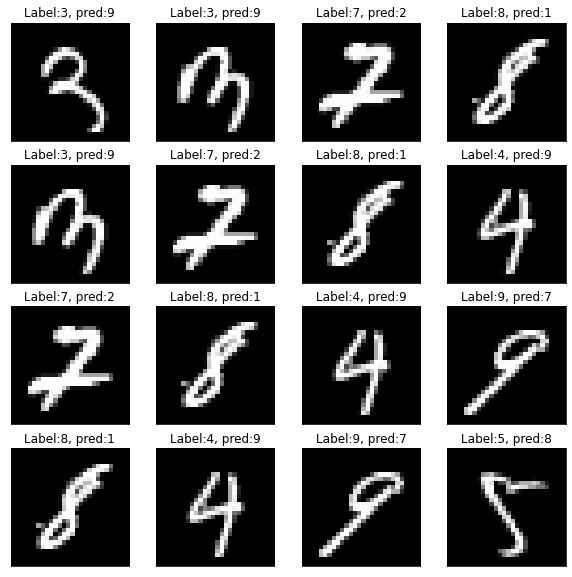

In [60]:
print("Incorrectly predicted Images by kNN = 4 Classifier:")
X_test_incorrect = X_test[y_test!=y_pred_knn,:]
y_test_incorrect = y_test[y_test!=y_pred_knn]
y_pred_knn_incorrect = y_pred_knn[y_test!=y_pred_knn]

fig, ax = plt.subplots(4, 4, figsize=(10,10))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(X_test_incorrect[i*4+j*4].reshape(28,28), cmap='gray')
        ax[i, j].set_title('Label:%s, pred:%s' % (y_test_incorrect[i*4+j*4], y_pred_knn_incorrect[i*4+j*4]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

Incorrectly predicted Images by Logistic Model:


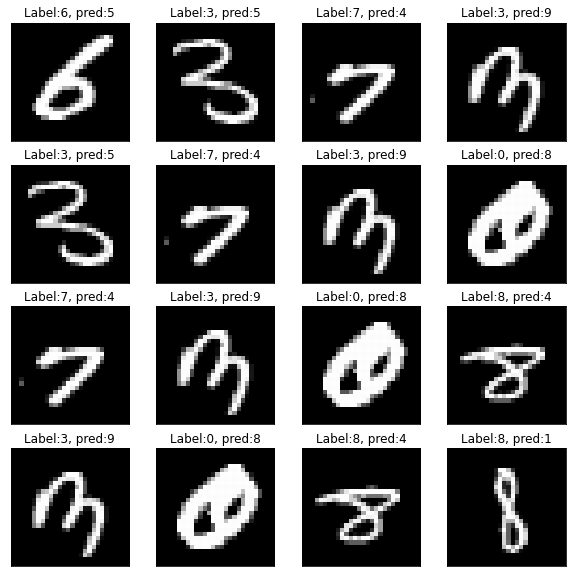

In [59]:
print("Incorrectly predicted Images by Logistic Model:")
X_test_incorrect = X_test[y_test!=y_pred_newton,:]
y_test_incorrect = y_test[y_test!=y_pred_newton]
y_pred_newton_incorrect = y_pred_newton[y_test!=y_pred_newton]

fig, ax = plt.subplots(4, 4, figsize=(10,10))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(X_test_incorrect[i*4+j*4].reshape(28,28), cmap='gray')
        ax[i, j].set_title('Label:%s, pred:%s' % (y_test_incorrect[i*4+j*4], y_pred_newton_incorrect[i*4+j*4]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])